In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


sess = tf.InteractiveSession()
z_dim = 100
batchs= 128
mnist = input_data.read_data_sets("/home/zhaocq/桌面/tensorflow/mnist/raw/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/t10k-images-idx3-ubyte.gz
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def weight_variable(shape):
    return tf.random_normal(shape, stddev=0.01)
def bias_variable(shape):
     return tf.zeros(shape)
#生成器随机噪声100维
z = tf.placeholder(tf.float32,shape=[None,100],name = 'z')
#鉴别器准备MNIST图像输入设置
x = tf.placeholder(tf.float32,shape=[None,784],name = 'x')
#生成器参数定义
g_w1 = tf.Variable(weight_variable([100,128]),name ='g_w1')
g_b1 = tf.Variable(bias_variable([128]),name ='g_b1')
g_w2 = tf.Variable(weight_variable([128,784]),name ='g_w2')
g_b2 = tf.Variable(bias_variable([784]),name ='g_b2')
generator_dict = [g_w1,g_b1,g_w2,g_b2]
#鉴别器参数定义
d_w1 = tf.Variable(weight_variable([784,128]),name ='d_w1')
d_b1 = tf.Variable(bias_variable([128]),name ='d_b1')
d_w2 = tf.Variable(weight_variable([128,1]),name ='d_w2')
d_b2 = tf.Variable(bias_variable([1]),name ='d_b2')
discriminator_dict = [d_w1,d_b1,d_w2,d_b2]


In [3]:
#生成器网络定义
def generator(z):
    g_h1 = tf.nn.relu(tf.matmul(z,g_w1) + g_b1)
    g_h2 = tf.nn.sigmoid(tf.matmul(g_h1,g_w2) + g_b2)
    return g_h2
#定义鉴别器
def discrimnator(x):
    d_h1 = tf.nn.relu(tf.matmul(x,d_w1)+d_b1)
    d_logit = tf.matmul(d_h1,d_w2)+d_b2
    d_prob = tf.nn.sigmoid(d_logit)
    return d_prob,d_logit


g_sample = generator(z)
d_real,d_logit_real = discrimnator(x)
d_fake,d_logit_fake = discrimnator(g_sample)
#定义损失
d_loss = - tf.reduce_mean(tf.log(d_real) + tf.log(1.- d_fake))
g_loss = - tf.reduce_mean(tf.log(d_fake))
#定义优化器，仅优化相关参数
d_slover = tf.train.AdamOptimizer().minimize(d_loss,var_list = discriminator_dict)
g_slover = tf.train.AdamOptimizer().minimize(g_loss,var_list = generator_dict)


In [4]:
#训练过程
def sample_z(m,n):
    '''Uniform prior for G(z)'''
    return np.random.uniform(-1.,1.,size=[m,n])
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


sess.run(tf.global_variables_initializer())
i=0
for it in range(20000):
    #输出image
    if it % 10000 == 0:
        samples = sess.run(g_sample,feed_dict={z: sample_z(16,100)})
        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)),bbox_inches = 'tight')
        i += 1
        plt.close(fig)
    x_md,_ =mnist.train.next_batch(batchs)
    _,d_loss_curr = sess.run([d_slover,d_loss],feed_dict={x: x_md, z: sample_z(batchs,z_dim)})
    _,g_loss_curr = sess.run([g_slover,g_loss],feed_dict={z: sample_z(batchs,z_dim)})
    
    if it % 10000 ==0:
        print('iter:{}'.format(it))
        print('d loss : {:.4}'.format(d_loss_curr))
        print('g loss : {:.4}'.format(g_loss_curr))
        print()
        


iter:0
d loss : 1.386
g loss : 0.7816

iter:10000
d loss : 0.6543
g loss : 2.629



[[1.92575693e-15 2.05099796e-15 1.90674422e-15 1.99017167e-15
  2.00016476e-15 1.96859944e-15 2.13603900e-15 1.84493834e-15
  2.00959498e-15 2.16593059e-15 1.85920958e-15 1.88575242e-15
  1.90172314e-13 8.39671553e-14 1.50173436e-14 4.20082009e-15
  2.09020605e-15 1.76423061e-15 1.84127514e-15 2.11009036e-15
  2.08765606e-15 2.34326074e-15 1.86505580e-15 1.65107516e-15
  2.50906554e-15 1.96303528e-15 1.84688165e-15 2.19048395e-15]
 [1.95389833e-15 2.04455331e-15 1.86970749e-15 1.96034870e-15
  1.29035542e-14 4.94862669e-14 2.06208748e-11 5.17876991e-11
  5.75378589e-09 2.24807217e-09 2.17333218e-09 2.50502674e-10
  6.30376237e-11 3.75620557e-09 7.79274885e-08 5.31196420e-08
  4.52316620e-08 5.68993421e-08 1.74224013e-08 3.02950525e-07
  6.17146334e-09 3.58093022e-09 3.85511631e-12 1.62113292e-12
  1.87148436e-15 1.90120971e-15 2.10648730e-15 1.86190674e-15]
 [1.88301353e-15 1.83490143e-15 3.32021635e-14 7.39964895e-11
  3.99046386e-11 1.88515675e-10 6.66377500e-12 1.03666220e-09
  3.69

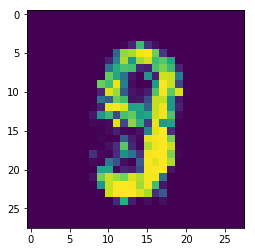

In [6]:
sampl = sess.run(g_sample,feed_dict={z: sample_z(10,100)})
I=np.reshape(sampl[1],(28,28))
print(I)
#plt.imshow(np.reshape(sampl[1],(28,28)))
plt.imshow(I)
